# Train the model using the BONE_CHANNELS dataset images

In [ ]:
dataset_to_use = "BONE_CHANNELS"
dataset_dir = "../../datasets/" + dataset_to_use
model_dir = "../../models"
start_epoch = 1
n_epochs = 100
start_epoch = 1
batch_size = 1
color_model = "LAB"
model = None

augmentation_strategy = "random" # "no_augmentation", "color_augmentation", "inpainting_augmentation", "standard", "random"
augmentation = [None,
                "horizontal_flip", 
                "vertical_flip", 
                "rotation", 
                "transpose", 
                "elastic_transformation", 
                "grid_distortion", 
                "optical_distortion",
                #"color_transfer", 
                #"inpainting"]
]

if dataset_to_use == "BONE_CHANNELS_reduced_size":
    from bones_train_512x512 import *
    from bones_dataloader_512x512 import *
    patch_size = (512, 512)
else:
    from bones_train import *
    from bones_dataloader import *
    patch_size = (640, 640)
    
result_file_csv = "../../datasets/" + dataset_to_use + "/training/bones_training_accuracy_loss.csv"
            
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size,
                                shuffle=False,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model,
                                augmentation=augmentation,
                                augmentation_strategy=augmentation_strategy,
                                start_epoch=start_epoch,
                                validation_split=0.2)

train_model_with_validation(dataloaders=dataloaders,
                            model=model,
                            n_epochs=n_epochs,
                            start_epoch=start_epoch,
                            use_cuda=True,
                            augmentation_strategy=augmentation_strategy,
                            output_dir=model_dir,
                            augmentation_operations=augmentation,
                            result_file_csv=result_file_csv)


### Plot loss and accuracy lines

In [ ]:
train['accuracy'].to_numpy()

In [ ]:
import pandas as pd 
from IPython.core.display import HTML

training_dir = "../../datasets/BONE_CHANNELS/training"
csv_file_path = "{}/bones_training_accuracy_loss.csv".format(training_dir)
df = pd.read_csv(csv_file_path) 

train = df[df['phase'] == 'train']
valid = df[df['phase'] == 'test']

train_best_accuracy = train[train['accuracy']==train['accuracy'].max()]
display(HTML(train_best_accuracy.to_html()))

valid_best_accuracy = valid[valid['accuracy']==valid['accuracy'].max()]
display(HTML(valid_best_accuracy.to_html()))

df_loss_lines = pd.DataFrame({
    'loss train (random)': train['loss'].to_numpy(),
    'loss valid (random)': valid['loss'].to_numpy()},
    index = train['epoch'])

df_accuracy_lines = pd.DataFrame({
    'acc train (random)': train['accuracy'].to_numpy(),
    'acc valid (random)': valid['accuracy'].to_numpy()}, 
    index = train['epoch'])



In [ ]:
df_accuracy_lines['acc train (random)'][101:201]

In [8]:
df_accuracy_lines

,acc train (random),acc valid (random)
epoch,,
1,0.9729608661465785,0.9755200754947159
1,0.9637258676382215,0.969613219144052
2,0.9707601761031934,0.9697511800130207
3,0.9706115856799451,0.9746980580112391
4,0.9750854626330699,0.9764170114617601
...,...,...
96,0.987934729450269,0.974749455945245
97,0.9879671663851336,0.9749258791167162
98,0.9882252975488119,0.9750809399834985


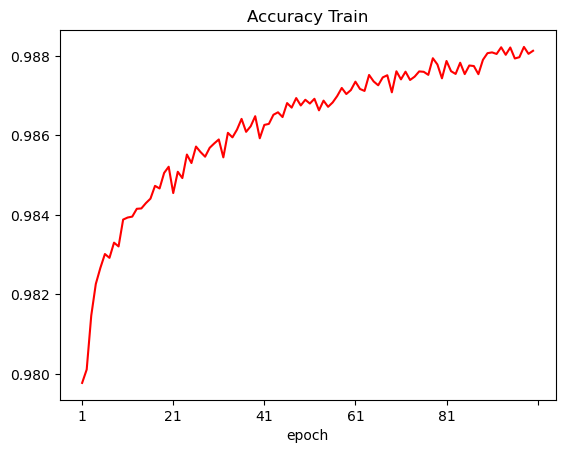

In [18]:
df_accuracy_lines['acc train (random)']=df_accuracy_lines['acc train (random)'][101:201].astype(float)
df_accuracy_lines['acc valid (random)']=df_accuracy_lines['acc valid (random)'][101:201].astype(float)
accuracy_lines = df_accuracy_lines['acc train (random)'][101:201].plot.line(title='Accuracy Train', color='red')


#df_loss_lines
#print(df_accuracy_lines.dtypes)

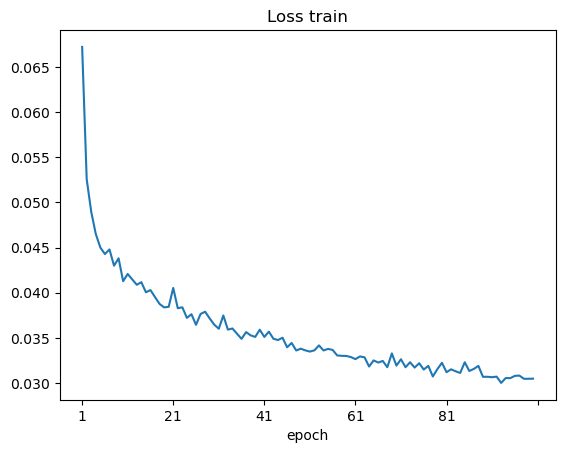

In [17]:
df_loss_lines['loss train (random)']=df_loss_lines['loss train (random)'][101:201].astype(float)
df_loss_lines['loss valid (random)']=df_loss_lines['loss valid (random)'][101:201].astype(float)
loss_lines = df_loss_lines['loss train (random)'][101:201].plot.line(title='Loss train')